# Exploratory Data Analysis

In [1]:
# %pip install --py luxwidget
# %pip enable --py luxwidget

In [19]:
# import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import missingno as msno
import great_tables as gt 
import tableone
import scipy 
import lux
import os

%matplotlib inline


# Set default plotting style and set all parematers as standard ready to publish plots
def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")

    # Set the default context with font scale
    sns.set_context("paper",
                    font_scale=1.3, rc={"lines.linewidth": 1.0})

    # Set the default color palette
    sns.set_palette("plasma")

    # Set the default figure size
    plt.rcParams['figure.figsize'] = [10, 6]

# Call the function to set the default plotting style
set_plotting_style()
         
# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Import the training data
churn_train = pd.read_csv(r'C:\Users\HP\Desktop\Customer Churn Prediction\Data\Processed\churn_train.csv')

# Display first 5 rows of the data set
churn_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
# Import the training data
churn_test = pd.read_csv(r'C:\Users\HP\Desktop\Customer Churn Prediction\Data\Processed\churn_test.csv')

# Display first 5 rows of the data set
churn_test.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Feature Engineering

In [5]:
from sklearn.preprocessing import LabelEncoder

# Separate numerical and categorical features (train set)
numerical_features = churn_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = churn_train.select_dtypes(include=['object']).columns

# Encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    churn_train[feature] = le.fit_transform(churn_train[feature])

# Encode target to 0 and 1
le = LabelEncoder()
churn_train['churn'] = le.fit_transform(churn_train['churn'])

In [6]:
# Separate numerical and categorical features (test set)
numerical_features = churn_test.select_dtypes(include=['int64', 'float64']).columns
categorical_features = churn_test.select_dtypes(include=['object']).columns

# Encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    churn_test[feature] = le.fit_transform(churn_test[feature])

# Encode target to 0 and 1
le = LabelEncoder()
churn_test['churn'] = le.fit_transform(churn_test['churn'])

In [7]:
churn_train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2666 non-null   int64  
 1   area_code               2666 non-null   int64  
 2   international_plan      2666 non-null   int32  
 3   voice_mail_plan         2666 non-null   int32  
 4   number_vmail_messages   2666 non-null   int64  
 5   total_day_minutes       2666 non-null   float64
 6   total_day_calls         2666 non-null   int64  
 7   total_day_charge        2666 non-null   float64
 8   total_eve_minutes       2666 non-null   float64
 9   total_eve_calls         2666 non-null   int64  
 10  total_eve_charge        2666 non-null   float64
 11  total_night_minutes     2666 non-null   float64
 12  total_night_calls       2666 non-null   int64  
 13  total_night_charge      2666 non-null   float64
 14  total_intl_minutes      2666 non-null   

In [8]:
churn_test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          667 non-null    int64  
 1   area_code               667 non-null    int64  
 2   international_plan      667 non-null    int32  
 3   voice_mail_plan         667 non-null    int32  
 4   number_vmail_messages   667 non-null    int64  
 5   total_day_minutes       667 non-null    float64
 6   total_day_calls         667 non-null    int64  
 7   total_day_charge        667 non-null    float64
 8   total_eve_minutes       667 non-null    float64
 9   total_eve_calls         667 non-null    int64  
 10  total_eve_charge        667 non-null    float64
 11  total_night_minutes     667 non-null    float64
 12  total_night_calls       667 non-null    int64  
 13  total_night_charge      667 non-null    float64
 14  total_intl_minutes      667 non-null    fl

In [9]:
churn_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
churn_test.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
# Save the train data
churn_train.to_csv('C:/Users/HP/Desktop/Customer Churn Prediction/Data/Processed/churn_train.csv', index=False)

# Save the test data
churn_test.to_csv('C:/Users/HP/Desktop/Customer Churn Prediction/Data/Processed/churn_test.csv', index=False)

In [16]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (2666, 19)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    18 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
    All variables classified into correct types.


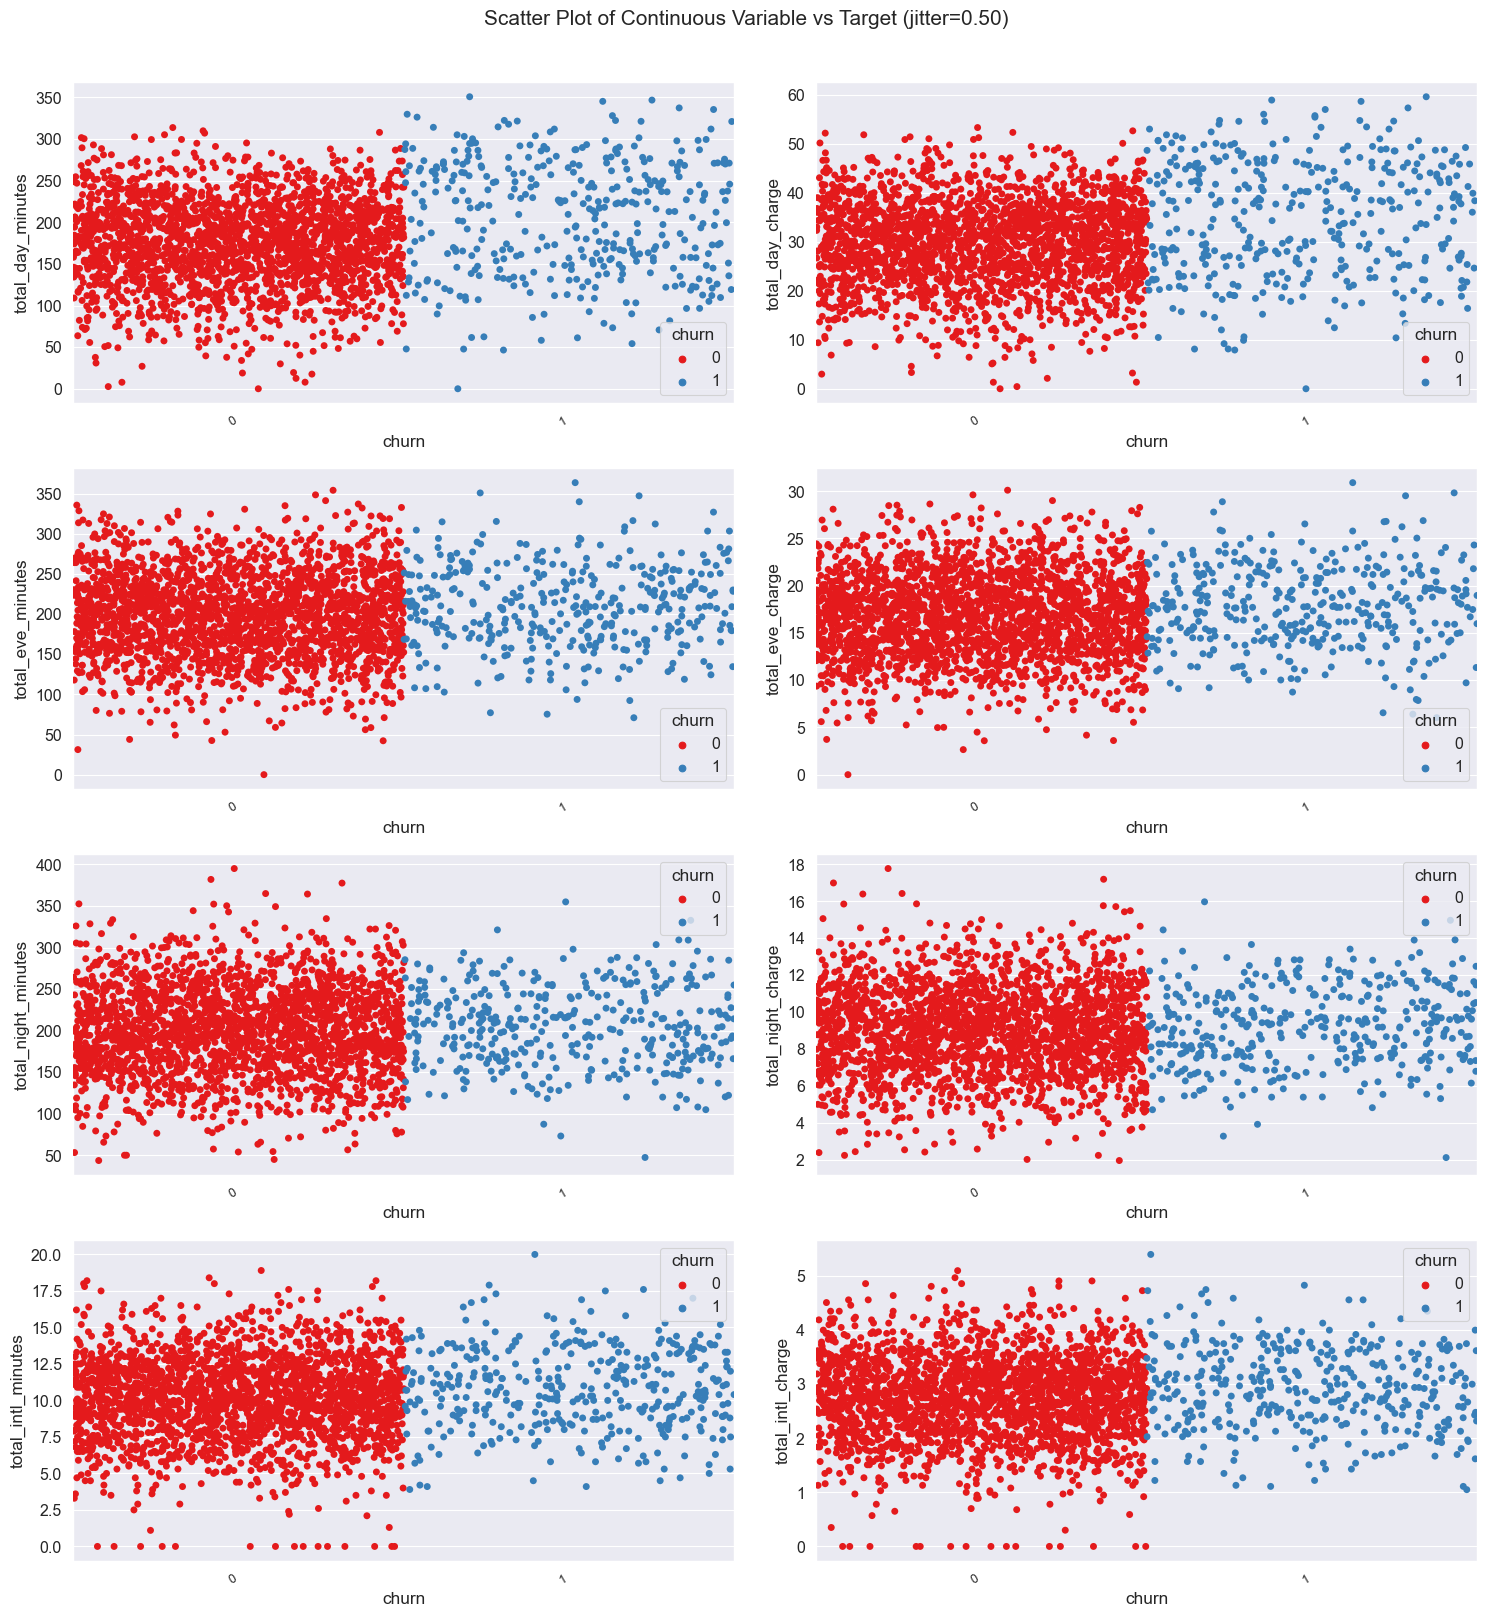

Total Number of Scatter Plots = 36


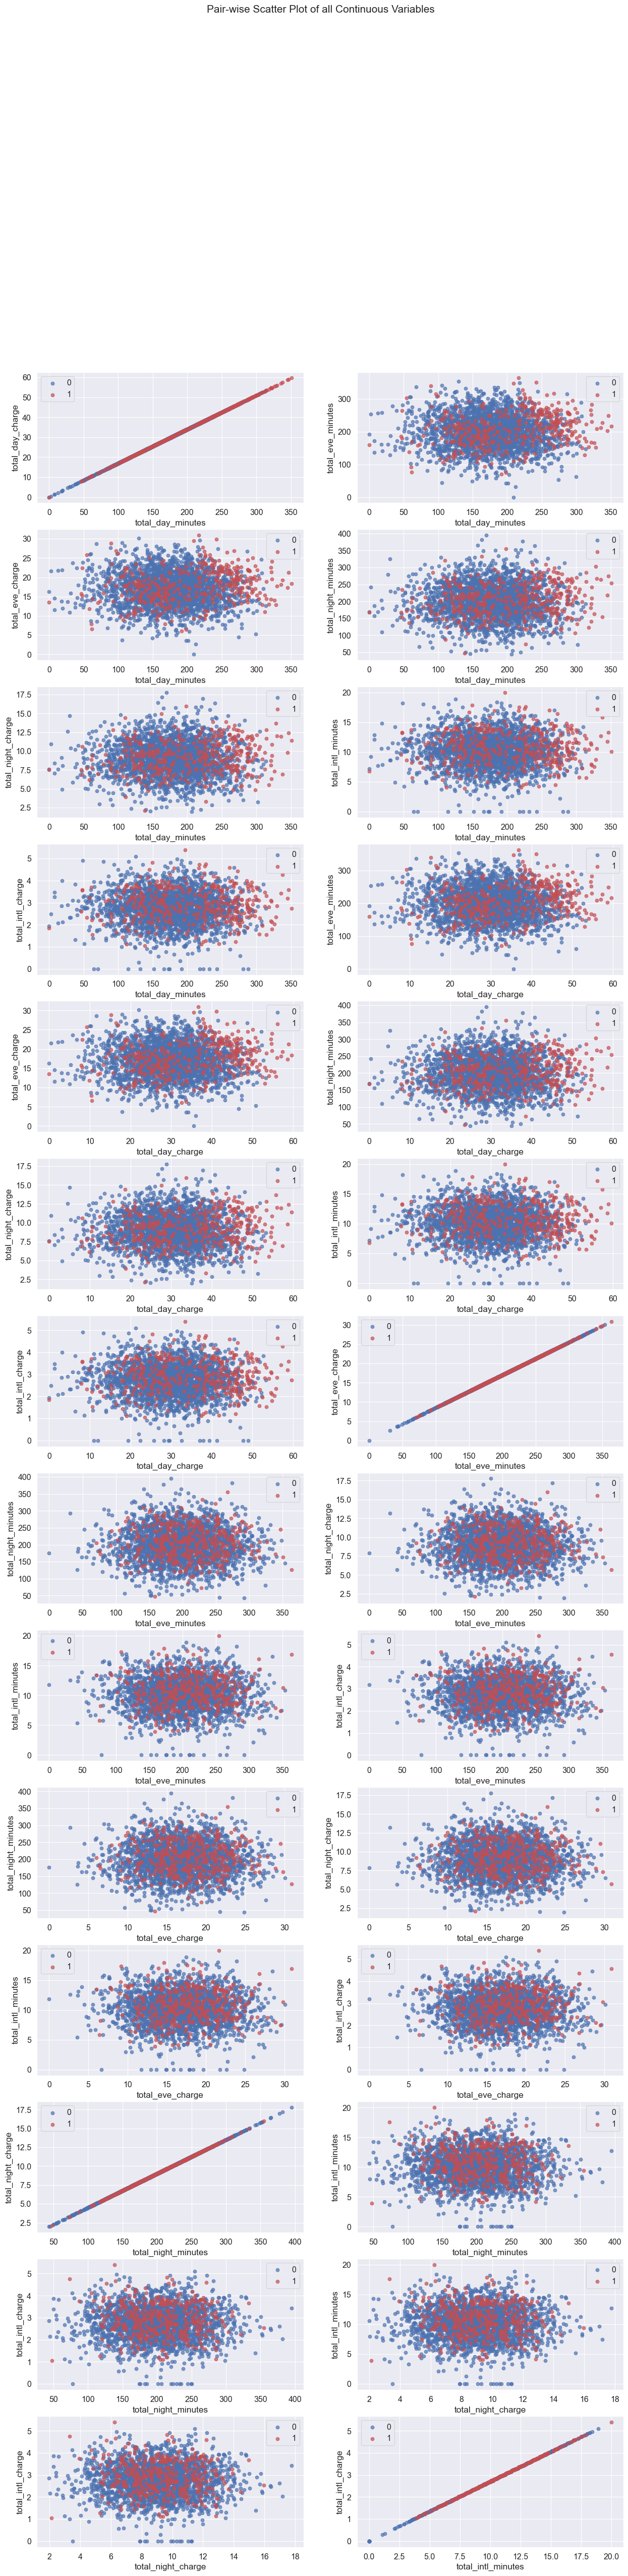

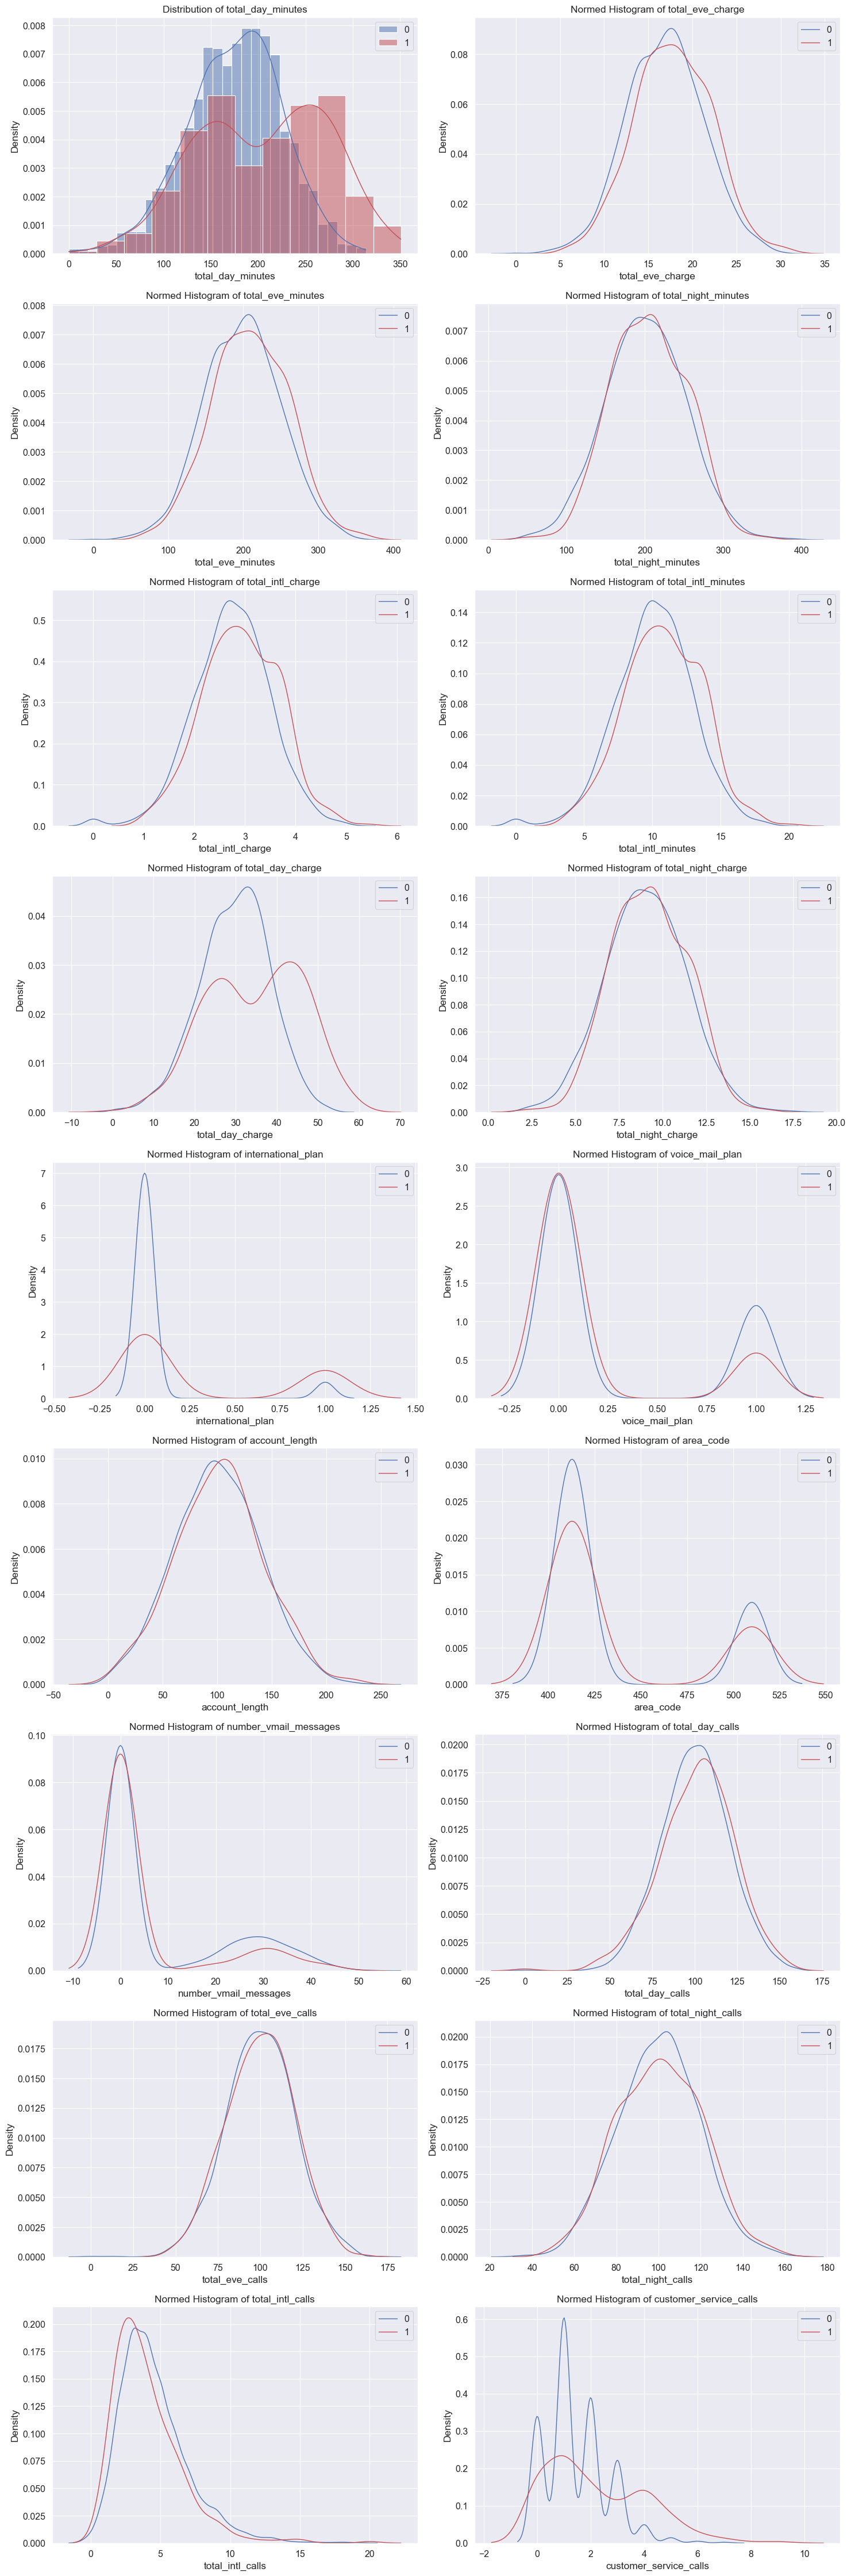

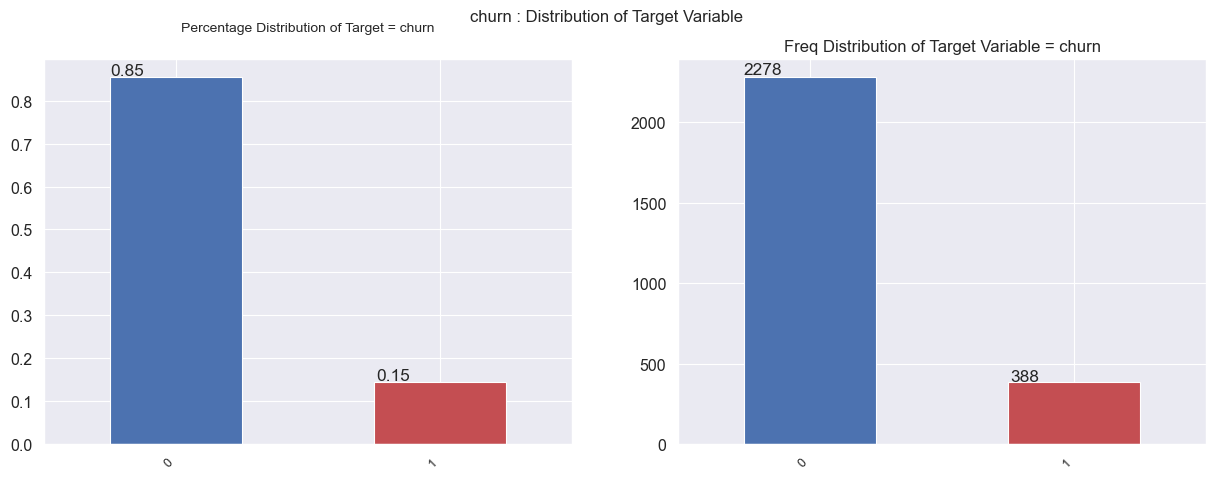

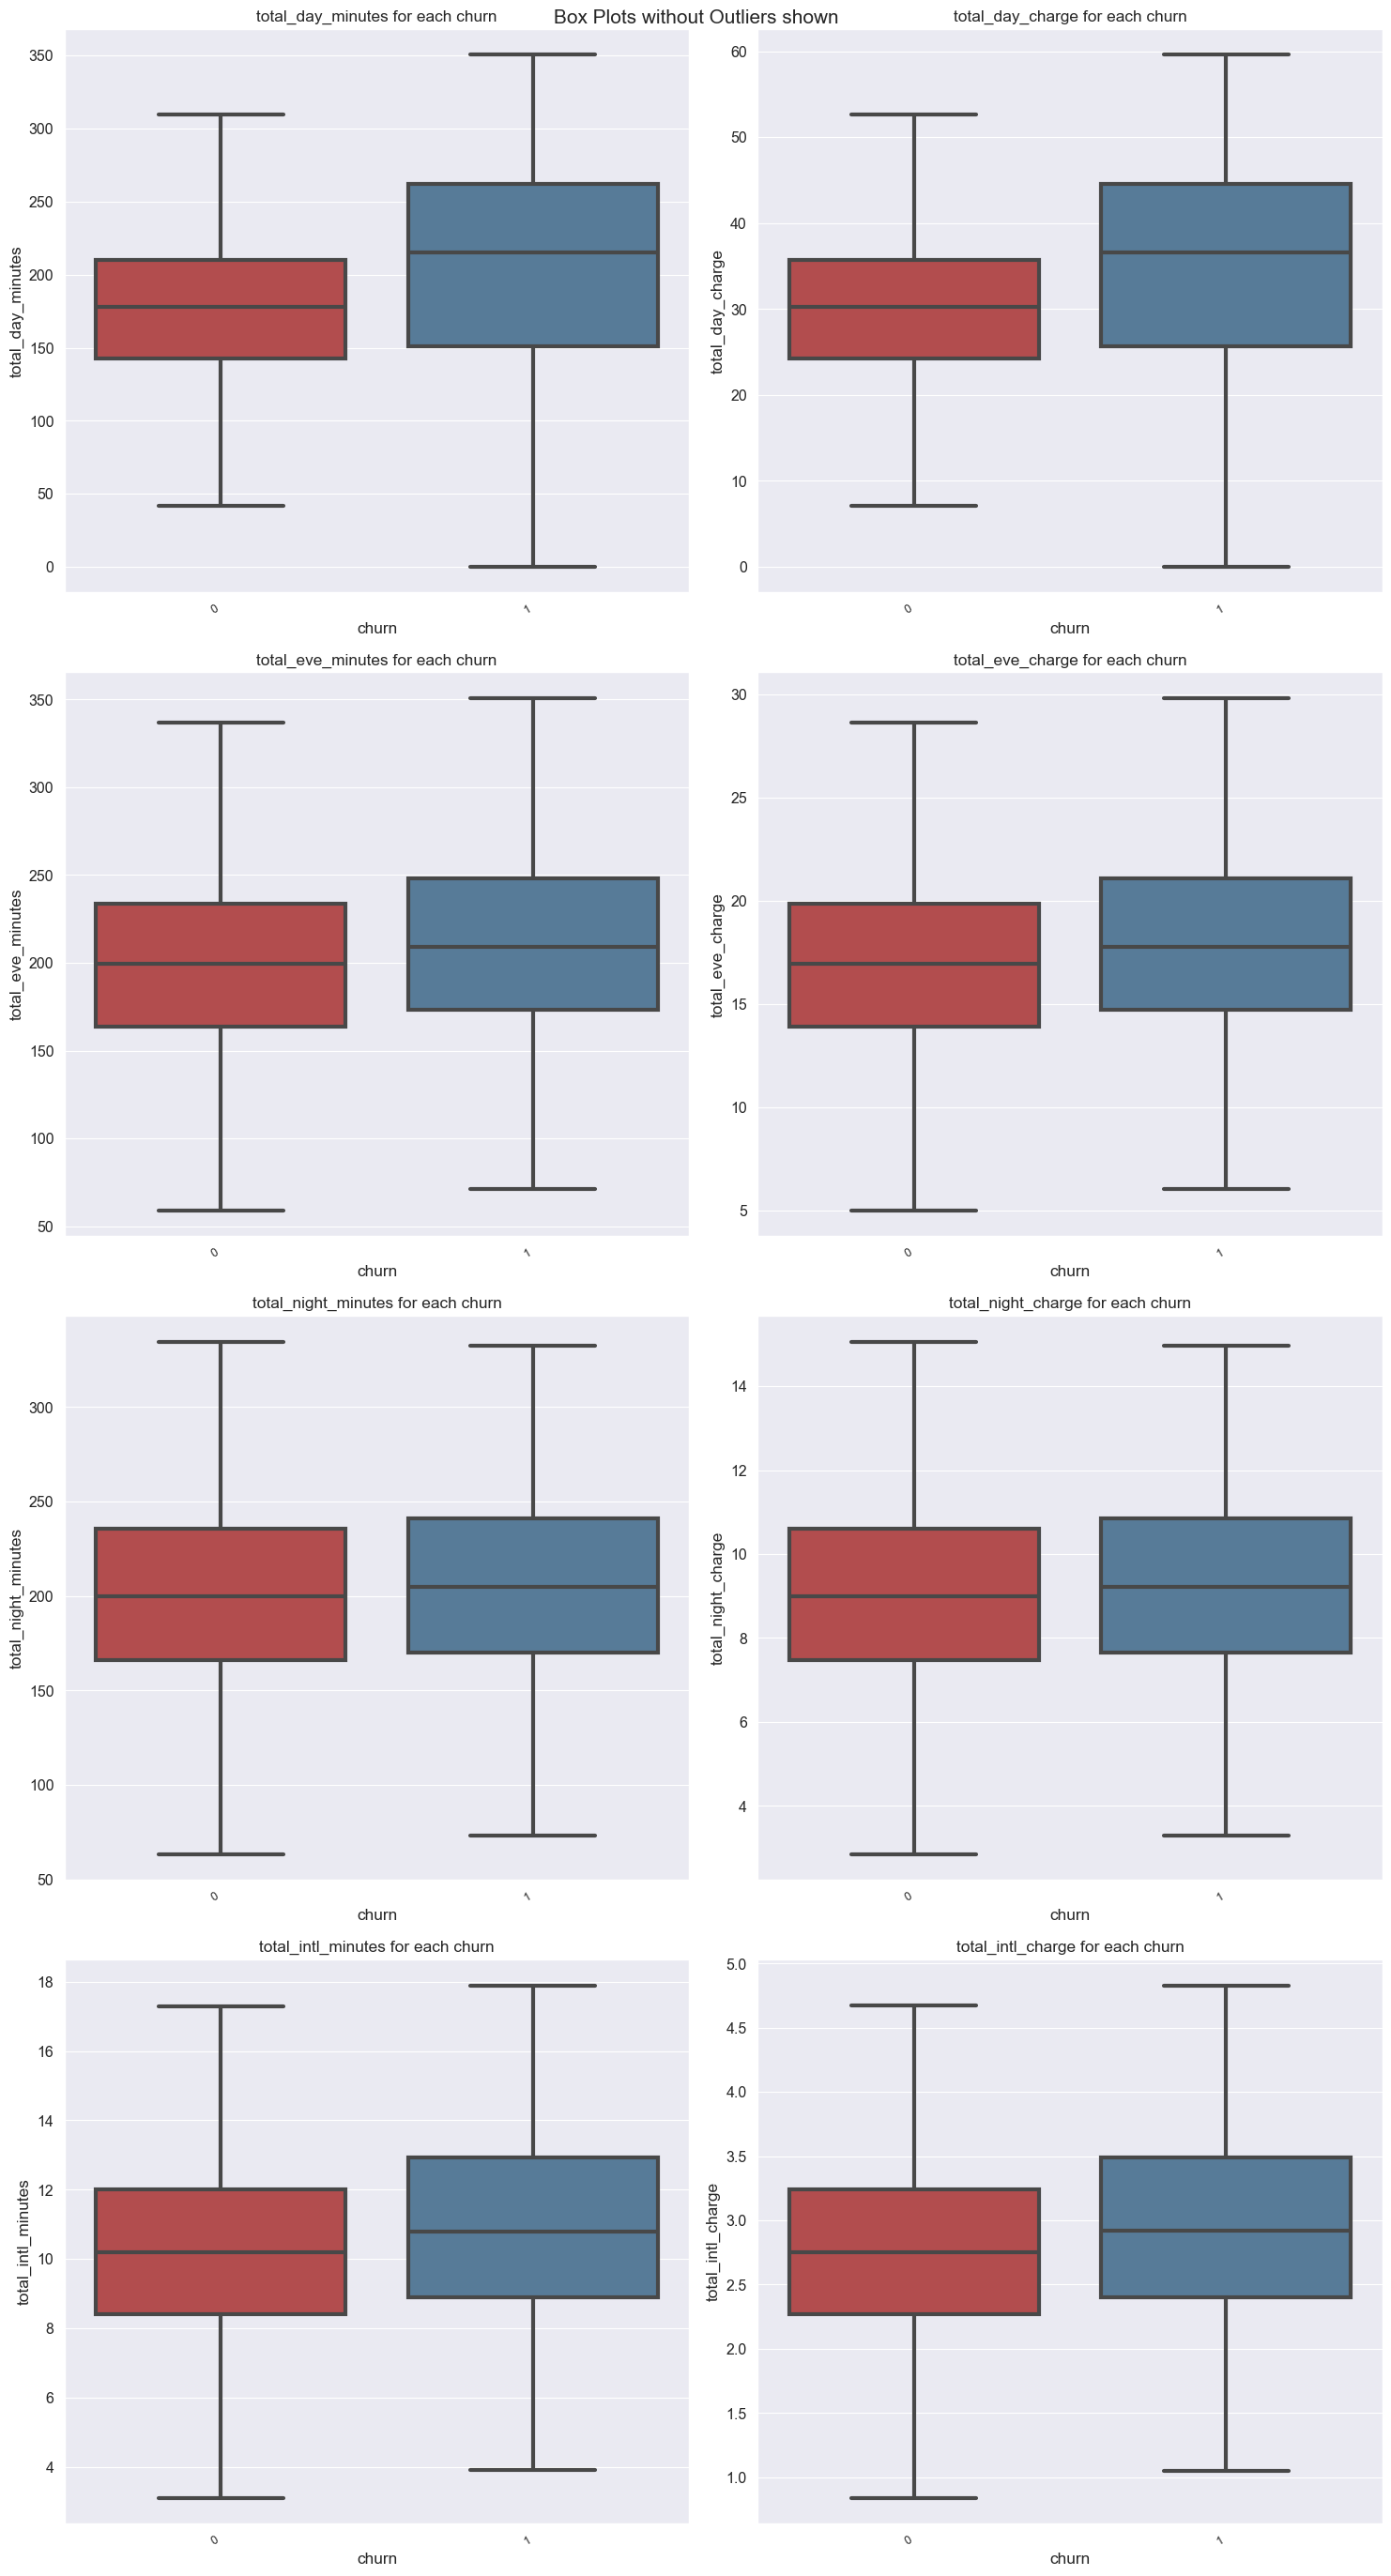

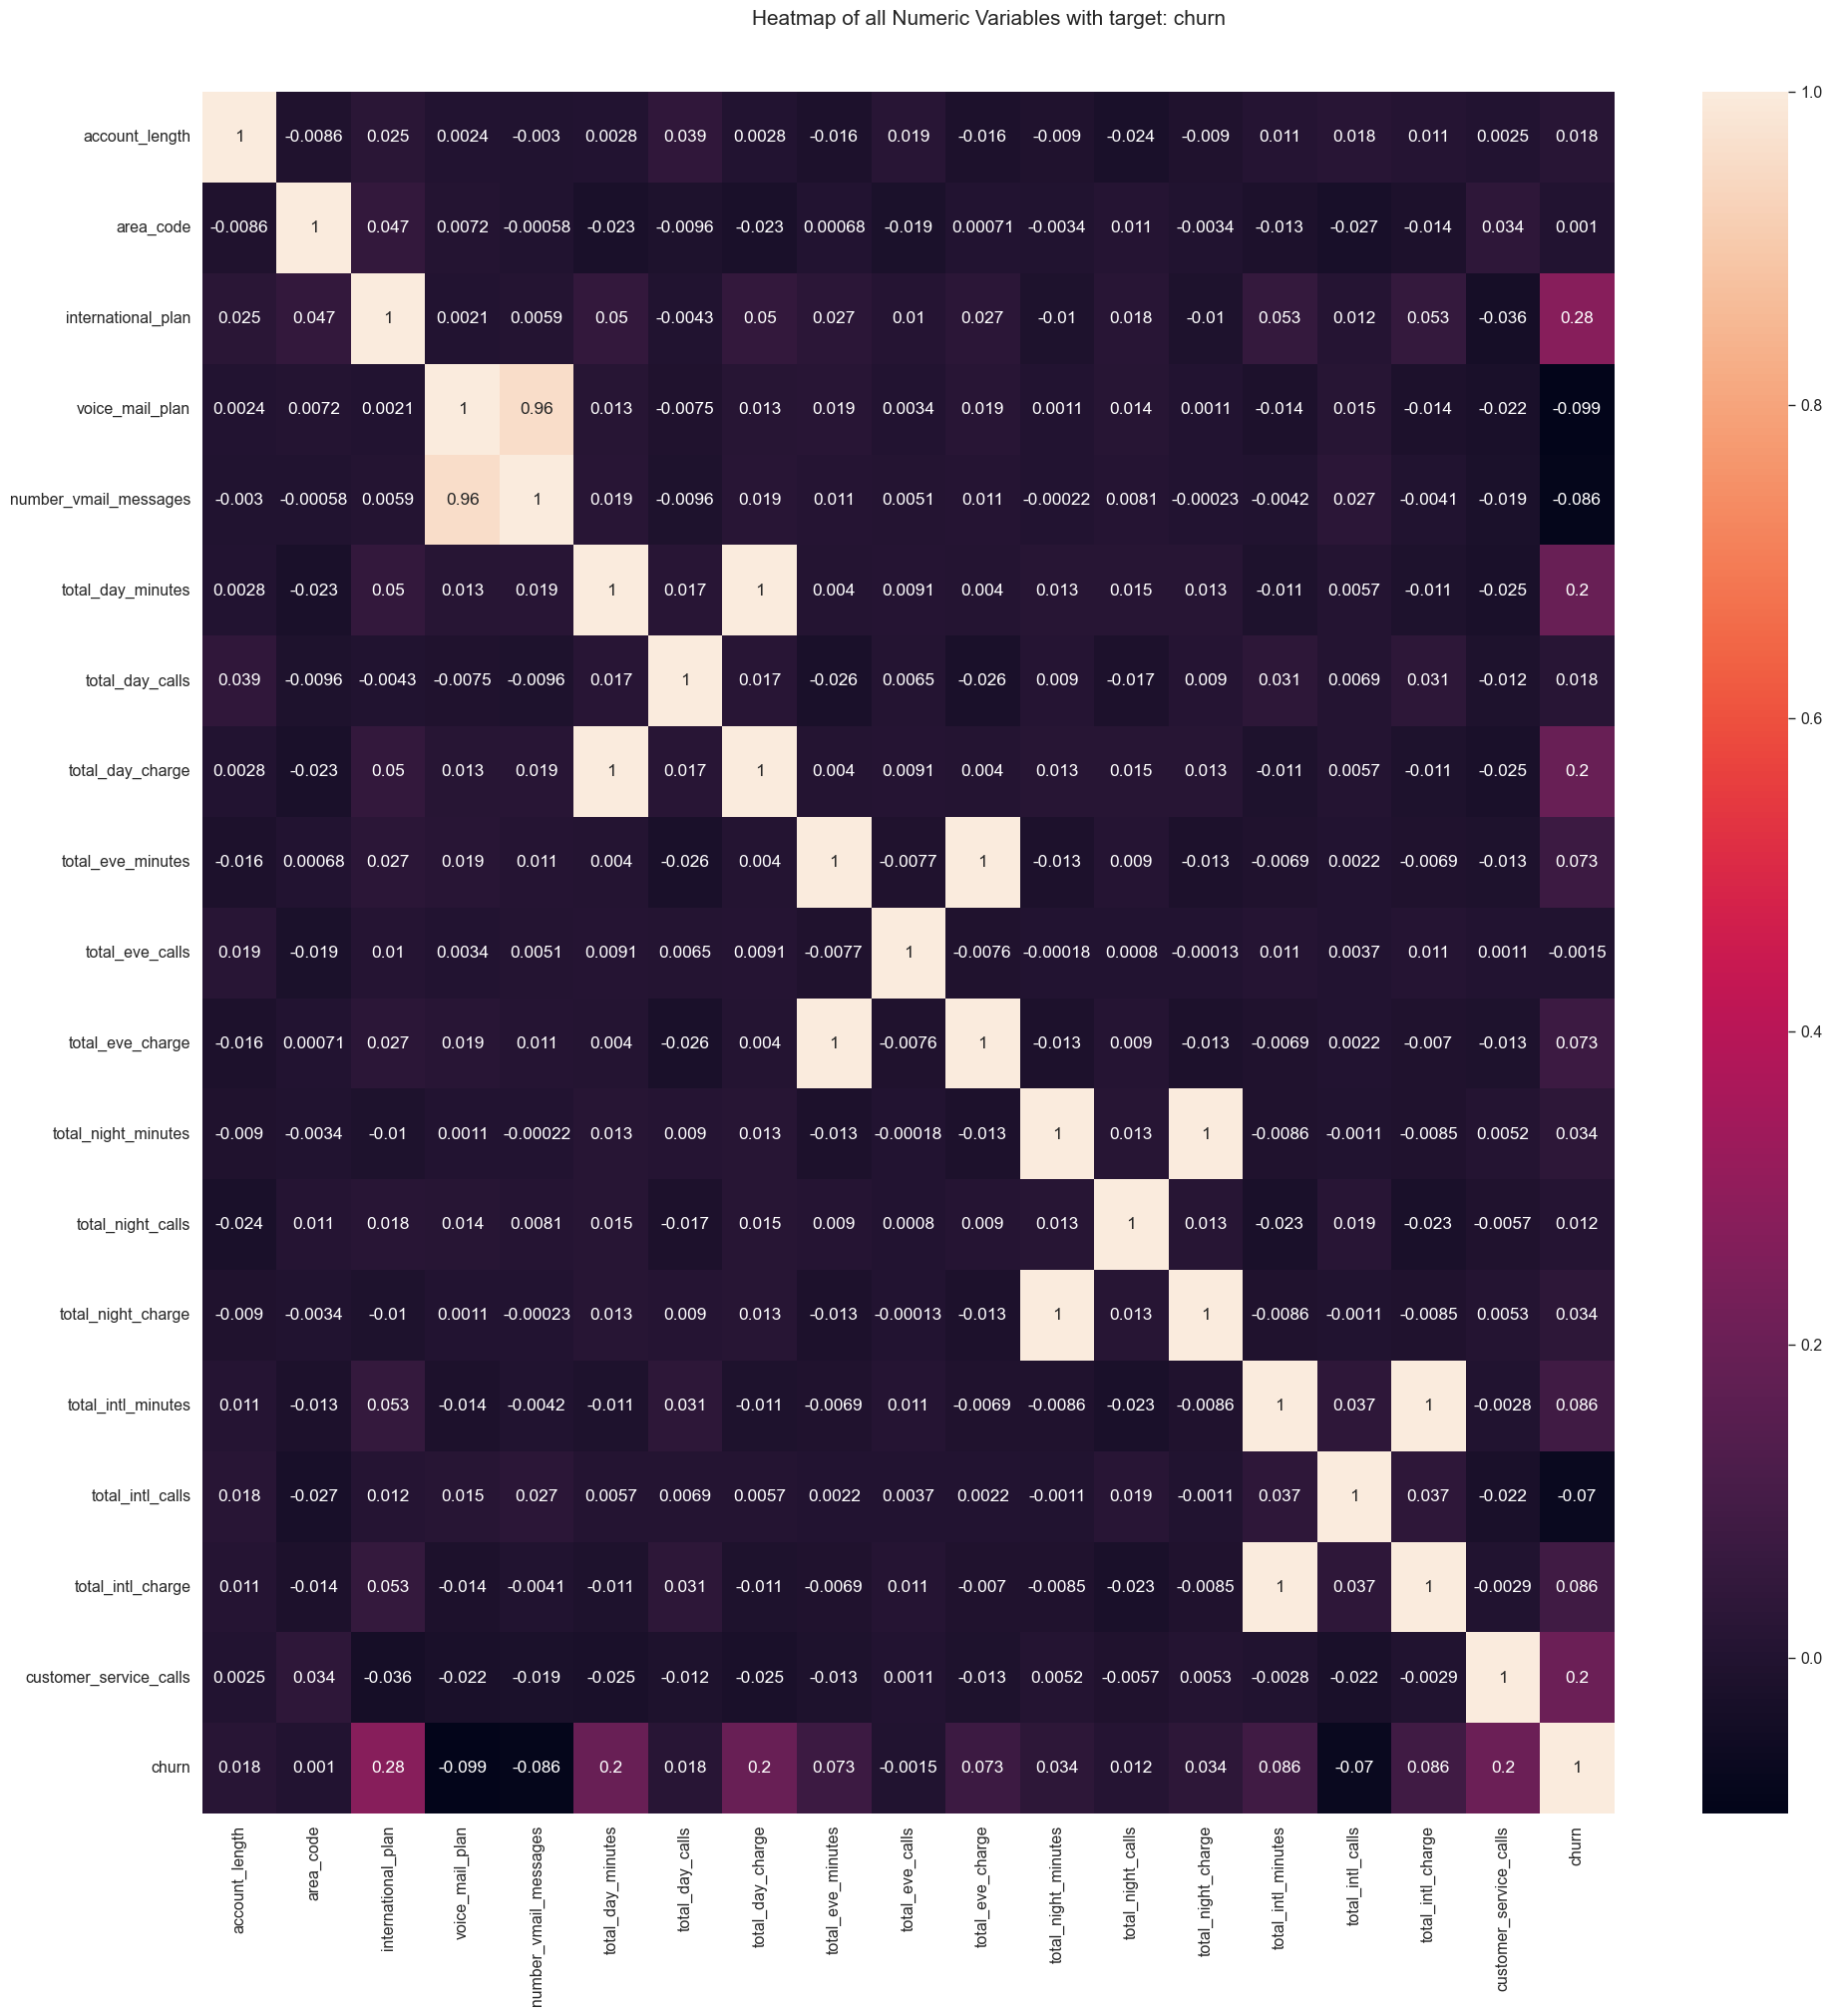

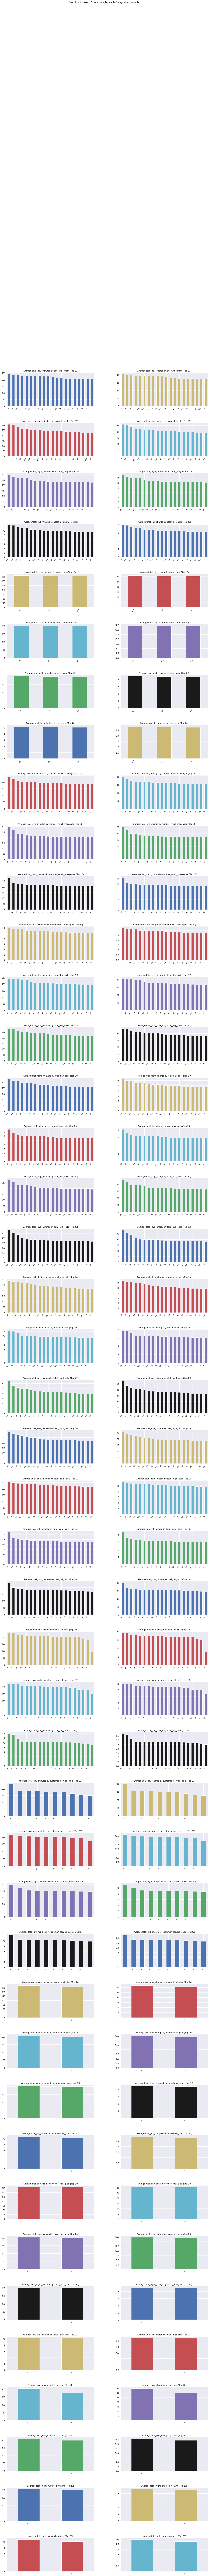

All Plots done
Time to run AutoViz = 81 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [21]:
filename = "C:/Users/HP/Desktop/Customer Churn Prediction/Data/Processed/churn_train.csv"
sep = ","

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="churn",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)